#Code

##Preparing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np

In [ ]:
names = ['Apple Braeburn','Apple Golden','Apple Granny Smith','Apple Pink Lady','Apple Red Yellow',
        'Apricot','Avocado','Banana Red','Banana','Beetroot',
         'Blueberry','Cactus fruit','Cauliflower','Cherry Yellow','Coconut',
         'Corn or Maize','Daisy','Dandelion','Tulips','Watermelon'
]

In [ ]:
len(names)

20

In [ ]:
image_size = 227
img_channel = 3 #Ảnh màu RGB
batch_size = 64
color_mode = 'rgb'

##Data

In [ ]:
train_data = image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/DEEP/Fruit_Flower_Veg_Train_Dev',
    labels = 'inferred', #lấy tên label là tên của thư mục
    label_mode = 'categorical', #phân lớp 2 biến đầu ra => nhị phân
    class_names = names,
    color_mode = color_mode,
    batch_size = batch_size,
    image_size = (image_size, image_size),
    interpolation = 'bilinear', #Thông số mặc định
)

Found 14985 files belonging to 20 classes.


In [ ]:
dev_data = image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/DEEP/Fruit_Flower_Veg_Train_Dev',
    labels = 'inferred', #lấy tên label là tên của thư mục
    label_mode = 'categorical', #phân lớp 2 biến đầu ra => nhị phân
    class_names = names,
    color_mode = color_mode,
    batch_size = batch_size,
    image_size = (image_size, image_size),
    interpolation = 'bilinear', #Thông số mặc định
    subset = "validation",
    seed = 1,
    validation_split = 0.1,
)

Found 14985 files belonging to 20 classes.
Using 1498 files for validation.


In [ ]:
test_data = image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/DEEP/Fruit_Flower_Veg_Test',
    labels = 'inferred', #lấy tên label là tên của thư mục
    label_mode = 'categorical', 
    class_names = names,
    color_mode = color_mode,
    batch_size = batch_size,
    image_size = (image_size, image_size),
    interpolation = 'bilinear',
)

Found 4005 files belonging to 20 classes.


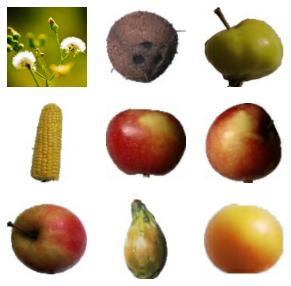

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (5,5))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(np.squeeze(images[i].numpy().astype("uint8")))
    plt.axis("off")

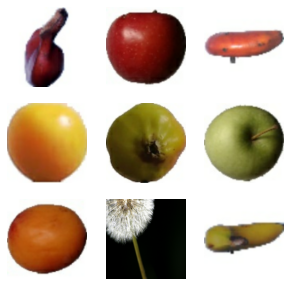

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (5,5))
for images, labels in dev_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(np.squeeze(images[i].numpy().astype("uint8")))
    plt.axis("off")

##AlexNet

In [ ]:
#https://www.youtube.com/watch?v=8GheVe2UmUM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import batch_normalization

import numpy as np

In [ ]:
image_shape = (227,227,3)
#np.random.seed(1000)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 96, input_shape = image_shape, kernel_size = (11,11), strides = (4,4), padding = 'valid' ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))
model.add(Conv2D(filters = 256, kernel_size = (5,5), strides = (1,1),  padding = 'valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))
model.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1),  padding = 'valid'))
model.add(Activation('relu'))
model.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1),  padding = 'valid'))
model.add(Activation('relu'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), strides = (1,1),  padding = 'valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))

model.add(Flatten())

model.add(Dense(4096, input_shape = (227*227*3,)))
model.add(Activation('relu'))

model.add(Dropout(0.4))

model.add(Dense(4096))
model.add(Activation('relu'))

model.add(Dropout(0.4))

model.add(Dense(len(names)))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 23, 23, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                    

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [ ]:
history = model.fit(train_data, epochs= 10, validation_data= dev_data)

Epoch 1/15
235/235 [==============================] - 1240s 5s/step - loss: 2.1571 - accuracy: 0.4634 - val_loss: 0.4933 - val_accuracy: 0.8198
Epoch 2/15
235/235 [==============================] - 34s 140ms/step - loss: 0.3854 - accuracy: 0.8646 - val_loss: 0.1884 - val_accuracy: 0.9306
Epoch 3/15
235/235 [==============================] - 34s 139ms/step - loss: 0.2511 - accuracy: 0.9176 - val_loss: 0.3500 - val_accuracy: 0.8705
Epoch 4/15
235/235 [==============================] - 34s 140ms/step - loss: 0.2697 - accuracy: 0.9107 - val_loss: 0.3251 - val_accuracy: 0.9019
Epoch 5/15
235/235 [==============================] - 34s 142ms/step - loss: 0.2892 - accuracy: 0.9070 - val_loss: 0.1591 - val_accuracy: 0.9433
Epoch 6/15
235/235 [==============================] - 34s 142ms/step - loss: 0.2817 - accuracy: 0.9124 - val_loss: 0.7468 - val_accuracy: 0.8004
Epoch 7/15
235/235 [==============================] - 34s 140ms/step - loss: 0.2596 - accuracy: 0.9209 - val_loss: 0.4421 - val_acc

<Figure size 432x288 with 0 Axes>

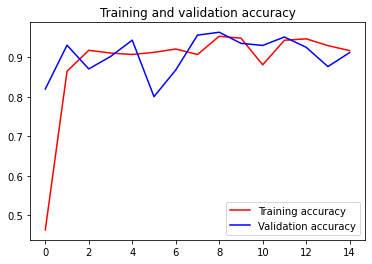

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import numpy as np

y_pred_total = []
y_true = []

for img, label in test_data:
    y_pred = model.predict(img)
    y_pred_total += np.argmax(y_pred,axis=-1).tolist()
    y_true += np.array(np.argmax(label,axis=-1)).flatten().tolist()
    
print(accuracy_score(y_true, y_pred_total)*100)
print(f1_score(y_true, y_pred_total,average='macro')*100)
print(recall_score(y_true,y_pred_total,average='macro')*100)
print(precision_score(y_true,y_pred_total,average='macro')*100)

87.26591760299625
91.49236896619179
92.85932184813032
91.10546500380707


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_total, digits=3, target_names= names))

              precision    recall  f1-score   support

           0      0.994     1.000     0.997       164
           1      0.976     1.000     0.988       164
           2      1.000     0.988     0.994       164
           3      0.974     1.000     0.987       152
           4      0.982     1.000     0.991       164
           5      0.994     0.994     0.994       164
           6      1.000     1.000     1.000       143
           7      0.869     1.000     0.930       166
           8      0.953     0.988     0.970       166
           9      0.938     1.000     0.968       150
          10      0.963     1.000     0.981       154
          11      0.922     1.000     0.960       166
          12      0.830     1.000     0.907       234
          13      0.994     1.000     0.997       164
          14      0.994     0.940     0.966       166
          15      0.953     0.953     0.953       150
          16      0.906     0.598     0.721       761
          17      0.481    

In [ ]:
model.save('model_AlexNet.h5')